In [1]:
%config Completer.use_jedi = False

In [4]:
import pandas as pd
from tqdm.notebook import tqdm
import re

from typing import List
import os
import matplotlib.pyplot as plt

In [76]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(
    vector_size=100,
    window=10, 
    min_count=2,
    sg=0,
    workers=1,
    seed=42
)

In [77]:
def load_docs(source_dir: str) -> List[List[str]]:
    docs = load_docs
    for doc_name in os.listdir(source_dir):
        if os.path.isdir(doc_name):
            continue
        with open(f'{source_dir}/{doc_name}') as fh:
            doc = fh.readlines()
            docs.append(doc)
    return docs

In [78]:
docs = load_docs('clean_txt')

In [79]:
docs_tokenized = [sent.split() for doc in docs for sent in doc]

### Word2Vec модель

In [80]:
%%time
model_w2v.epochs = 10

model_w2v.build_vocab(docs_tokenized)

model_w2v.train(docs_tokenized,
                total_examples=model_w2v.corpus_count,
                epochs=model_w2v.epochs)

CPU times: user 1min 9s, sys: 176 ms, total: 1min 9s
Wall time: 1min 8s


(42969242, 45933760)

In [81]:
model_w2v.wv.most_similar('пациент')

[('больной', 0.8669501543045044),
 ('лицо', 0.6264879703521729),
 ('циент', 0.5577524304389954),
 ('пациентка', 0.5300016403198242),
 ('паци', 0.47800737619400024),
 ('табла', 0.4687282145023346),
 ('человек', 0.4636669456958771),
 ('инсультомтранзиторный', 0.4513360559940338),
 ('тот', 0.44570407271385193),
 ('случай', 0.44215628504753113)]

In [82]:
from sklearn.metrics.pairwise import cosine_similarity

def show_similarity_for_single_word(model, word):
    matrix = cosine_similarity(model.wv[word].reshape(1, -1), model.wv.vectors)
    plt.hist(matrix.squeeze(0), bins='rice', edgecolor='k')
    plt.title(f'Распределение схожести для слова {word}')

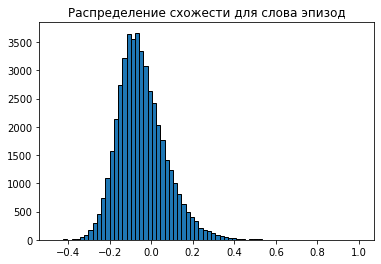

In [83]:
show_similarity_for_single_word(model_w2v, 'эпизод')

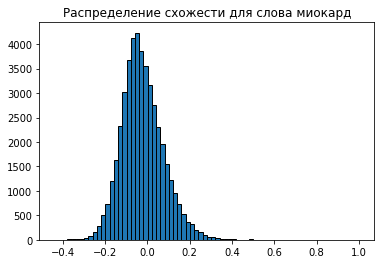

In [84]:
show_similarity_for_single_word(model_w2v, 'миокард')